In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# 1. Phase préparatoire des données 

---------


## 1.1 Chargement

In [2]:
# mettez le chemin de VOTRE fichier
PATH_DATA = '../Assets/spotify/all.csv'

In [3]:
sp = pd.read_csv(PATH_DATA, sep = '\t')

## 1.2 Rapide tour du propriétaire

In [4]:
sp.shape

(671, 12)

In [5]:
sp.ndim

2

In [6]:
sp.dtypes

title           object
artist          object
release         object
bpm              int64
energy           int64
danceability     int64
loud             int64
valence          int64
length          object
acoustic         int64
popularity       int64
style           object
dtype: object

In [7]:
sp.head()

,title,artist,release,bpm,energy,danceability,loud,valence,length,acoustic,popularity,style
0,Don't Let Me Down,The Chainsmokers,5/02/16,160,87,53,-5,42,03:28,16,84,POP
1,In the Name of Love,Martin Garrix,29/07/16,134,52,50,-6,17,03:16,11,83,POP
2,FRIENDS,Marshmello,9/02/18,95,88,63,-2,53,03:23,21,90,POP
3,The Middle,Zedd,23/01/18,107,65,75,-3,43,03:05,21,54,POP
4,Never Forget You,Zara Larsson,10/09/15,146,73,58,-6,28,03:33,0,22,POP


## 1.3 Transformation

Juste au-dessus de ce titre, nous pouvons remarquer que la variable *length* est en string. 
Faisons en sorte que la longueur de chaque chanson soit représentée en secondes.

Pour ce faire, réalisons une petite fonction :

In [8]:
def length_str_to_min(length):
    minutes, secondes = list(map(lambda v: int(v), length.split(':')))
    return minutes * 60 + secondes

Appliquons-là et créons une nouvelle colonne qui se nommera *length_minutes* :

In [9]:
sp['length_minutes'] = sp['length'].apply(length_str_to_min)

Visualisons le résultat :

In [10]:
sp.head()

,title,artist,release,bpm,energy,danceability,loud,valence,length,acoustic,popularity,style,length_minutes
0,Don't Let Me Down,The Chainsmokers,5/02/16,160,87,53,-5,42,03:28,16,84,POP,208
1,In the Name of Love,Martin Garrix,29/07/16,134,52,50,-6,17,03:16,11,83,POP,196
2,FRIENDS,Marshmello,9/02/18,95,88,63,-2,53,03:23,21,90,POP,203
3,The Middle,Zedd,23/01/18,107,65,75,-3,43,03:05,21,54,POP,185
4,Never Forget You,Zara Larsson,10/09/15,146,73,58,-6,28,03:33,0,22,POP,213


# 2. Phase d'étude de nos données

*****

Maintenant que nos données sont dans un format approprié, nous pouvons commencer à en faire une analyse plus approfondie. Pour ce faire, attardons-nous sur chacune de nos colonnes (ou presque). La méthode **describe** nous donnera un bon point de départ.

In [11]:
sp.describe()

,bpm,energy,danceability,loud,valence,acoustic,popularity,length_minutes
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,118.926975,63.529061,58.238450,-7.931446,48.728763,26.265276,56.053651,237.104322
std,28.451410,24.981163,17.227531,5.008775,25.950833,32.770044,22.342118,88.880355
min,51.000000,0.000000,8.000000,-31.000000,3.000000,0.000000,1.000000,67.000000
25%,99.000000,49.000000,46.000000,-9.000000,29.000000,1.000000,42.000000,188.000000
50%,115.000000,70.000000,60.000000,-6.000000,49.000000,9.000000,59.000000,218.000000
75%,137.000000,83.000000,71.000000,-5.000000,70.000000,44.000000,73.000000,262.000000
max,205.000000,99.000000,96.000000,0.000000,97.000000,99.000000,99.000000,1356.000000


## 2.1 Tous les styles

### 2.1.1 BPM = le tempo

In [12]:
music_bpm_max = sp.iloc[sp['bpm'].idxmax()]
music_bpm_min = sp.iloc[sp['bpm'].idxmin()]

In [13]:
print(music_bpm_min)
print(music_bpm_max)

title                      The Choice
artist            Gustavo Santaolalla
release                       7/06/13
bpm                                51
energy                              0
danceability                       30
loud                              -31
valence                            35
length                          01:42
acoustic                           91
popularity                         65
style                      DEEP FOCUS
length_minutes                    102
Name: 199, dtype: object
title             Gotta Get Funky
artist                 Doctorfunk
release                  28/10/03
bpm                           205
energy                         78
danceability                   55
loud                           -5
valence                        93
length                      03:36
acoustic                        9
popularity                     38
style                        FUNK
length_minutes                216
Name: 519, dtype: object


BPM min : <a href='https://www.youtube.com/watch?v=kPk6y6P2lUo'>Youtube : The choice</a>
<br>
BPM max : <a href='https://www.youtube.com/watch?v=qnu5TlVa1J4'>Youtube : Go get funky</a>

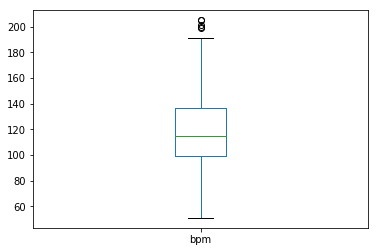

In [14]:
sp['bpm'].plot.box()

### 2.1.2 Energy

In [15]:
music_en_max = sp.iloc[sp['energy'].idxmax()]
music_en_min = sp.iloc[sp['energy'].idxmin()]

In [16]:
print(music_en_min)
print(music_en_max)

title                      The Choice
artist            Gustavo Santaolalla
release                       7/06/13
bpm                                51
energy                              0
danceability                       30
loud                              -31
valence                            35
length                          01:42
acoustic                           91
popularity                         65
style                      DEEP FOCUS
length_minutes                    102
Name: 199, dtype: object
title             East Bay! Oakland Style!
artist                      Tower Of Power
release                            1/06/18
bpm                                    127
energy                                  99
danceability                            65
loud                                    -8
valence                                 71
length                               01:16
acoustic                                 1
popularity                              40
style   

BPM min : <a href='https://www.youtube.com/watch?v=kPk6y6P2lUo'>Youtube : The choice</a>
<br>
BPM max : <a href='https://www.youtube.com/watch?v=zXEw-jdlcNc'>Youtube : East Bay! Oakland Style!</a>

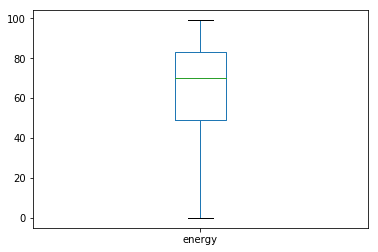

In [17]:
sp['energy'].plot.box()

### 2.1.3 Loud

In [18]:
music_ld_max = sp.iloc[sp['loud'].idxmax()]
music_ld_min = sp.iloc[sp['loud'].idxmin()]

In [19]:
print(music_ld_min)
print(music_ld_max)

title                      The Choice
artist            Gustavo Santaolalla
release                       7/06/13
bpm                                51
energy                              0
danceability                       30
loud                              -31
valence                            35
length                          01:42
acoustic                           91
popularity                         65
style                      DEEP FOCUS
length_minutes                    102
Name: 199, dtype: object
title             In For The Kill
artist                    La Roux
release                      2009
bpm                           150
energy                         97
danceability                   61
loud                            0
valence                        94
length                      04:09
acoustic                        0
popularity                     59
style                   DECENNIES
length_minutes                249
Name: 623, dtype: object


BPM min : <a href='https://www.youtube.com/watch?v=kPk6y6P2lUo'>Youtube : The choice</a>
<br>
BPM max : <a href='https://www.youtube.com/watch?v=tXtATeQ7GKg'>Youtube : In for the Kill</a>

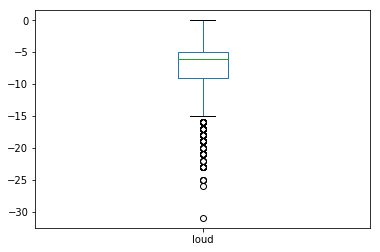

In [20]:
sp['loud'].plot.box()

Note : on peut remarquer la présence de plusieurs **outliers** ici. Nous verrons plus tard s'il faut les supprimer ou non.

### 2.1.4 Valence

In [21]:
music_ve_max = sp.iloc[sp['valence'].idxmax()]
music_ve_min = sp.iloc[sp['valence'].idxmin()]

In [22]:
print(music_ve_min)
print(music_ve_max)

title                      Fallen
artist            Elise Magnefold
release                  18/10/17
bpm                           100
energy                         11
danceability                   54
loud                          -22
valence                         3
length                      04:38
acoustic                       98
popularity                     63
style                  DEEP FOCUS
length_minutes                278
Name: 210, dtype: object
title                     Wannabe in LA
artist            Eagles Of Death Metal
release                        28/10/08
bpm                                 159
energy                               95
danceability                         63
loud                                 -4
valence                              97
length                            02:16
acoustic                             28
popularity                            1
style                              ROCK
length_minutes                      136
Name: 186, dt

BPM min : pas de lien Youtube
<br>
BPM max : <a href='https://www.youtube.com/watch?v=xj3kTdx1QBw'>Youtube : Wannbe in LA</a>

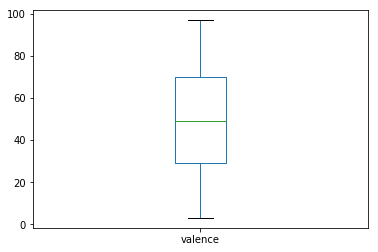

In [23]:
sp['valence'].plot.box()

### 2.1.5 Acoustic

In [24]:
music_ac_max = sp.iloc[sp['acoustic'].idxmax()]
music_ac_min = sp.iloc[sp['acoustic'].idxmin()]

In [25]:
print(music_ac_min)
print(music_ac_max)

title             Never Forget You
artist                Zara Larsson
release                   10/09/15
bpm                            146
energy                          73
danceability                    58
loud                            -6
valence                         28
length                       03:33
acoustic                         0
popularity                      22
style                          POP
length_minutes                 213
Name: 4, dtype: object
title                 Fusion
artist            Eroded Sky
release             10/11/17
bpm                      120
energy                    14
danceability              55
loud                     -17
valence                   10
length                 03:48
acoustic                  99
popularity                67
style             DEEP FOCUS
length_minutes           228
Name: 195, dtype: object


BPM min : <a href='https://www.youtube.com/watch?v=GTyN-DB_v5M'>Youtube : Never Forget You</a>
<br>
BPM max : <a href='https://www.youtube.com/watch?v=KYZjvMmKqmw'>Youtube : Fusion</a>

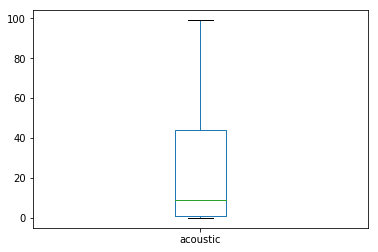

In [26]:
sp['acoustic'].plot.box()

### 2.1.6 Danceability

In [27]:
music_dy_max = sp.iloc[sp['danceability'].idxmax()]
music_dy_min = sp.iloc[sp['danceability'].idxmin()]

In [28]:
print(music_dy_min)
print(music_dy_max)

title                    Glaciers
artist            Lights & Motion
release                   2/02/18
bpm                            56
energy                         16
danceability                    8
loud                          -18
valence                         4
length                      02:56
acoustic                       73
popularity                     65
style                  DEEP FOCUS
length_minutes                176
Name: 193, dtype: object
title             Get Dripped (feat. Playboi Carti)
artist                                   Lil Yachty
release                                    19/10/18
bpm                                             130
energy                                           49
danceability                                     96
loud                                             -8
valence                                          90
length                                        02:39
acoustic                                         10
popularity   

BPM min : <a href='https://www.youtube.com/watch?v=TX3Zr5RX1ug'>Youtube : Glaciers</a>
<br>
BPM max : <a href='https://www.youtube.com/watch?v=PtPAu17Vw_I'>Youtube : Get Dripped</a>

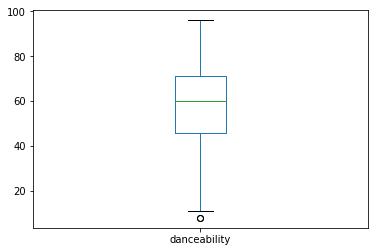

In [29]:
sp['danceability'].plot.box()

## 2.2 Les corrélations

Nous pouvons observer les différentes corrélations entre *danceability* et les autres :

In [30]:
sp.corr()['danceability']

bpm              -0.044197
energy            0.290425
danceability      1.000000
loud              0.410181
valence           0.546807
acoustic         -0.312721
popularity        0.187963
length_minutes   -0.121361
Name: danceability, dtype: float64

Tout ceci n'est pas très visuel. Arrangeons cela grâce à seaborn :

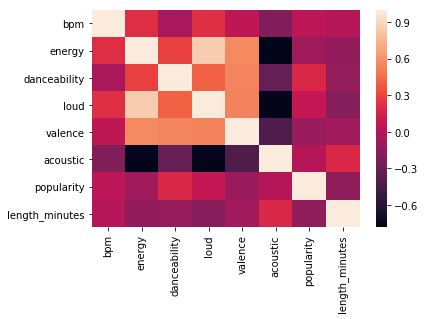

In [31]:
sns.heatmap(sp.corr())

Les points les plus clairs indiquent les endroits les plus corrélés. En nous concentrant exclusivement vers *danceability*, quelques éléments ressortent du lot : **energy, loud et valence**. D'ailleurs, sauvegardons-les dans une variable appelée **features**.

In [32]:
features = ['energy', 'loud', 'valence']

## 2.3 Les outliers de loud

Comme nous l'avons précédemment vu, *loud* est constitué de plusieurs outliers. Maintenant, que faut-il en faire ?

Par principe, il ne faut ni les altérer ni les supprimer. S'il s'agissait d'outliers où nous sommes persuadés qu'ils sont dus à une erreur (humaine par exemple), alors, nous aurions pu les supprimer. Les outliers de loud ne doivent pas être retirés car ce ne sont pas des erreurs. Ainsi, nous allons les laisser comme tels.

## 2.4 Scaling

N'oublions pas de normaliser nos features :

In [33]:
for feature in features:
    # normalisation
    sp['f_' + feature] = (sp[feature] - sp[feature].min()) / (sp[feature].max() - sp[feature].min())
    # standardisation
    #sp['f_' + feature] = (sp[feature] - sp[feature].mean()) / sp[feature].std()
    # no scaling
    #sp['f_' + feature] = sp[feature]

In [34]:
sp.head()

,title,artist,release,bpm,energy,danceability,loud,valence,length,acoustic,popularity,style,length_minutes,f_energy,f_loud,f_valence
0,Don't Let Me Down,The Chainsmokers,5/02/16,160,87,53,-5,42,03:28,16,84,POP,208,0.878788,0.838710,0.414894
1,In the Name of Love,Martin Garrix,29/07/16,134,52,50,-6,17,03:16,11,83,POP,196,0.525253,0.806452,0.148936
2,FRIENDS,Marshmello,9/02/18,95,88,63,-2,53,03:23,21,90,POP,203,0.888889,0.935484,0.531915
3,The Middle,Zedd,23/01/18,107,65,75,-3,43,03:05,21,54,POP,185,0.656566,0.903226,0.425532
4,Never Forget You,Zara Larsson,10/09/15,146,73,58,-6,28,03:33,0,22,POP,213,0.737374,0.806452,0.265957


Modifions les noms de nos features :

In [35]:
features = list(map(lambda f: 'f_' + f, features))

In [36]:
features

['f_energy', 'f_loud', 'f_valence']

# 3. Phase de construction de notre modèle

***

## 3.1 Avant la construction

### 3.1.1 Que cherchons-nous ?

Nous cherchons à trouver le score de *danceability* d'une chanson à travers ses attributs : **energy, loud et valence**. Toutefois, nous commencerons à prédire ce score en utilisant uniquement **l'energy**.

Pour faire nos tests, nous utiliserons ces données ([40, -10, 50] = **l'energy, loud puis valence**) :

In [37]:
music_for_test = pd.DataFrame([[0.7, 0.5, 1]], columns = ['f_energy', 'f_loud', 'f_valence']).iloc[0]

In [38]:
music_for_test

f_energy     0.7
f_loud       0.5
f_valence    1.0
Name: 0, dtype: float64

### 3.1.2 Procédure de la mise en place de l'agorithme du K-Nearest Neighbor

1. Nous devons choisir nos données sur lesquelles nous allons effectuer notre prédiction.
2. Il faut calculer la distance entre tous nos éléments. 
2. Il faut trier nos données par ordre croissant de nos distances.
3. On sélectionne les K plus proches voisins (le K est spécifié au début de l'algorithme).
4. Soit on fait la moyenne (si notre y est une variable continue/entière) soit on prend le mode (si notre y est une variable nominale).

## 3.2 Construction du modèle

Nous cherchons donc un score de *danceability*. Stockons cela dans une variable **target**.

In [39]:
target = 'danceability'

### 3.2.1 Prédiction via un paramètre (soit energy)

Nous utiliserons **l'energy** pour essayer de prédire le score. Sauvegardons cela dans une variable **mono_feature**

In [40]:
mono_feature = 'f_energy'

#### 3.2.1.1 Calcul des distances

Calculons nos distances en créant une fonction :

In [41]:
def distance_bt_energy_musics(energy_1, energy_2):
    return sqrt(((energy_1 - energy_2) ** 2))

Exemple d'utilisation :

In [42]:
# la méthode sample sur une DataFrame nous donne un échantillon de nos données
# ici, nous lui demandons de nous renvoyer un échantillon composé d'une unité
random_music = sp.sample(1, random_state = 1).iloc[0]

In [43]:
random_music

title             Facing My Fear
artist                    Cortes
release                 29/10/16
bpm                          168
energy                        81
danceability                  41
loud                          -3
valence                       64
length                     03:22
acoustic                       0
popularity                     2
style                       ROCK
length_minutes               202
f_energy                0.818182
f_loud                  0.903226
f_valence               0.648936
Name: 107, dtype: object

In [44]:
distance_bt_energy_musics(random_music[mono_feature], music_for_test[mono_feature])

0.11818181818181828

Le distance entre la musique aléatoire et la nôtre est de 0.11.

Maintenant, créons une nouvelle colonne **distance_energy** tout en faisant une copie de notre DataFrame :

In [45]:
e_music_test = music_for_test[mono_feature]
sp_dt_energy = sp.copy()
sp_dt_energy['distance_energy'] = sp_dt_energy['f_energy'].apply(lambda e: distance_bt_energy_musics(e, e_music_test))

In [46]:
sp_dt_energy.head()

,title,artist,release,bpm,energy,danceability,loud,valence,length,acoustic,popularity,style,length_minutes,f_energy,f_loud,f_valence,distance_energy
0,Don't Let Me Down,The Chainsmokers,5/02/16,160,87,53,-5,42,03:28,16,84,POP,208,0.878788,0.838710,0.414894,0.178788
1,In the Name of Love,Martin Garrix,29/07/16,134,52,50,-6,17,03:16,11,83,POP,196,0.525253,0.806452,0.148936,0.174747
2,FRIENDS,Marshmello,9/02/18,95,88,63,-2,53,03:23,21,90,POP,203,0.888889,0.935484,0.531915,0.188889
3,The Middle,Zedd,23/01/18,107,65,75,-3,43,03:05,21,54,POP,185,0.656566,0.903226,0.425532,0.043434
4,Never Forget You,Zara Larsson,10/09/15,146,73,58,-6,28,03:33,0,22,POP,213,0.737374,0.806452,0.265957,0.037374


#### 3.2.1.2 Trier par ordre croissant de distance

In [47]:
sorted_sp_dt_energy = sp_dt_energy.sort_values(by = 'distance_energy')

In [48]:
sorted_sp_dt_energy.head(10)

,title,artist,release,bpm,energy,danceability,loud,valence,length,acoustic,popularity,style,length_minutes,f_energy,f_loud,f_valence,distance_energy
576,Clint Eastwood,Gorillaz,26/03/01,168,69,66,-9,52,05:41,2,76,DECENNIES,341,0.696970,0.709677,0.521277,0.003030
477,Stuff,Kyle Hollingsworth,23/02/18,90,69,73,-6,69,04:47,6,42,FUNK,287,0.696970,0.806452,0.702128,0.003030
299,"Never Recover (Lil Baby & Gunna, Drake)",Lil Baby,5/10/18,132,69,76,-5,91,03:15,7,89,RAP,195,0.696970,0.838710,0.936170,0.003030
146,Free,Bleeker,21/10/16,184,69,53,-5,83,02:25,0,41,ROCK,145,0.696970,0.838710,0.851064,0.003030
495,Pick Up On Your Line,Jurassik Funk,10/01/10,114,69,70,-6,80,04:46,12,46,FUNK,286,0.696970,0.806452,0.819149,0.003030
501,Cloud 9,Jamiroquai,10/02/17,115,69,88,-8,43,03:57,40,4,FUNK,237,0.696970,0.741935,0.425532,0.003030
317,Mona Lisa (feat. Kendrick Lamar),Lil Wayne,28/09/18,122,69,86,-4,49,05:24,37,92,RAP,324,0.696970,0.870968,0.489362,0.003030
310,No Stylist,French Montana,20/09/18,147,70,77,-5,50,03:12,2,91,RAP,192,0.707071,0.838710,0.500000,0.007071
270,Guided by the Glowing Sea,The American Dollar,1/07/17,116,70,46,-12,13,04:29,0,55,DEEP FOCUS,269,0.707071,0.612903,0.106383,0.007071
14,New Rules,Dua Lipa,2/06/17,116,70,76,-6,61,03:29,0,88,POP,209,0.707071,0.806452,0.617021,0.007071


#### 3.2.1.3 On sélectionne les K plus proches voisins

In [49]:
k_neighbors_mono_feature = 5

In [50]:
neighbors_mono_feature = sorted_sp_dt_energy[:k_neighbors_mono_feature]

#### 3.2.1.4 On fait la moyenne de leur danceability

In [51]:
neighbors_mono_feature[target].mean()

67.6

#### 3.2.1.5 Sklearn est là pour nous épauler

Évidemment, cet algorithme n'est pas tout récent et celui-ci a déjà été implémenté dans la libraire scikit-learn.

Créons le modèle :

In [52]:
# on lui demande de se baser sur ses 5 proches voisons
# et nous avons spécifié l'algorithme en brute => c'est celui avec lequel nous avons précédemment travaillé
knn_mono = KNeighborsRegressor(5, algorithm = 'brute')

Donnons lui ensuite des données afin qu'il les "étudie" :

In [53]:
knn_mono.fit(sp_dt_energy[[mono_feature]], sp[target])

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

Enfin, nous pouvons lui demander de faire des prédictions :

In [54]:
knn_mono.predict(music_for_test[mono_feature])

array([67.6])

### 3.2.2 Multivariate K-Nearest Neighbors

Sous ce nom quelque peu imposant se cache un concept simple. Pour l'instant, nous n'avons utilisé qu'un seul paramètre pour prédire notre score. Ce n'est évidemment pas suffisant pour prédire avec précision la réalité. Une potentielle solution serait d'utiliser plusieurs paramètres : **energy, loud et valence**.

Lorsque vous utilisez plusieurs paramètres avec le K-Nearest Neighbors, on dit de lui qu'il est **multivariate**. 

Basons-nous sur le modèle que nous propose sklearn :

In [55]:
knn_multivariate = KNeighborsRegressor(5, algorithm='brute')

Entraînons notre modèle :

In [56]:
knn_multivariate.fit(sp[features], sp[target])

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

Réessayons de trouver le score de *danceability* de notre musique :

In [57]:
knn_multivariate.predict([music_for_test[features]])

array([69.6])

Nous voyons que notre score a augmenté. Cependant, il est pour l'instant impossible de dire si notre premier modèle est meilleur que le second (ou l'inverse) !

Pour vérifier cela, nous allons devoir **l'évaluer**.

### 3.2.3 Evaluation d'un modèle

Nous avons enfin obtenu un algorithme qui marche et qui est capable de réaliser des prédictions uniquement sur **l'energy**. Toutefois, cet algorithme n'est pas parfait et ne prédit pas à 100% un résultat réel. Nous nous devons donc de le contrôler à travers le procédé du **mean squared error**.

<img src='assets/mse_formula.png'/>

Ne soyez pas effrayé à cause de cette formule. Décomposons-là ensemble :
1. Dans la parenthèse, vous devez soustraire votre variable réelle 'target' et votre variable prédite (le résidu).
2. Réalisez ensuite le carré.
3. Répétez cette procédure autant de fois que vous avez d'éléments et additionnez-les.
4. Divisez ensuite par n (oui, il s'agit d'une moyenne).

Plus le résultat de cette formule sera proche de 0, meilleur sera votre modèle.

On peut déjà préparer nos Y (réels) :

In [58]:
Y = sp[target]

#### 3.2.3.1 Evalutation de notre premier modèle

In [59]:
Y_predicted_mono = knn_mono.predict(sp[[mono_feature]])

In [60]:
mse_mono = ((Y - Y_predicted_mono) ** 2).mean()
mse_mono

211.42187779433684

#### 3.2.3.2 Evaluation de notre second modèle

In [61]:
Y_predicted_multi = knn_multivariate.predict(sp[features])

In [62]:
mse_multi = ((Y - Y_predicted_multi) ** 2).mean()
mse_multi

130.39922503725782

Pour aller plus vite dans le calcul du **mse**, nous pouvons utiliser la fonction **mean_squared_error** de sklearn :

In [63]:
mean_squared_error(Y, Y_predicted_multi)

130.39922503725782

#### 3.2.3.3 Verdict

Grâce à ce mécanisme, nous pouvons dire que le second modèle est meilleur que le premier.

In [64]:
mse_multi < mse_mono

True

# 4. Utilisons l'outil sklearn

## 4.1 Préparons nos données pour entraîner et tester notre modèle

In [65]:
train, test = train_test_split(sp, test_size=0.2, random_state = 1)

In [66]:
train.head()

,title,artist,release,bpm,energy,danceability,loud,valence,length,acoustic,popularity,style,length_minutes,f_energy,f_loud,f_valence
312,REEL IT IN,Aminé,15/08/18,129,34,75,-9,42,02:01,7,87,RAP,121,0.343434,0.709677,0.414894
639,Teenage Dirtbag,Wheatus,15/02/99,95,85,63,-4,63,04:02,35,67,DECENNIES,242,0.858586,0.870968,0.638298
611,Call On Me - Radio Edit,Eric Prydz,13/09/04,126,84,60,-7,45,02:51,0,23,DECENNIES,171,0.848485,0.774194,0.446809
592,All The Things She Said,t.A.T.u.,2002,90,83,60,-6,45,03:34,4,30,DECENNIES,214,0.838384,0.806452,0.446809
116,Night People,You Me At Six,22/08/16,82,80,47,-5,41,03:04,0,38,ROCK,184,0.808081,0.838710,0.404255


## 4.2 Créer et entraîner notre modèle

In [67]:
# Nous le créons
knn = KNeighborsRegressor(n_neighbors = 5, algorithm = 'brute')

In [68]:
# Nous l'entraînons
knn.fit(train[features], train[target])

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [69]:
# Nous réalisons une prédiction
knn.predict([random_music[features]])

array([56.8])

## 4.3 Tester notre modèle

### 4.3.1 La validation croisée : théorie

sklearn nous propose quelques outils pour tester rapidement et facilement nos modèles. L'un d'entre eux se nomme ***KFold***. Afin de comprendre à quoi il correspond réellement, nous devons comprendre un nouveau concept : **l'entrainement** et le **test**.

Quand on **entraîne** un modèle, on extraira une partie de notre base de données afin de lui faire apprendre de nouvelles informations. Cette partie-là possède un nom : **training set**. Généralement, on utilise **80%** de nos ressources en tant que **training set**.

Dès lors, il nous reste logiquement 20% qui est non affecté. Justement, ces **20%** vont être utilisés pour **tester** notre modèle fraîchement construit.

L'outil ***KFold***, lui, fait tout ça à notre place et bien plus. Une image valant plus de mille mots :

<img src='http://i.imgur.com/gu3Fa6w.png'/>

<div style='text-align: center'>Source : Dataquest - <a href='http://i.imgur.com/gu3Fa6w.png'>lien de l'image</a></div>

En nous basant sur l'image, nous pouvons remarquer que le ***KFold*** réalise plusieurs itérations. Lors de chaque itération, il vous procure un **training** et un **test** set différent à chaque fois. Grâce à cela, il sera plus facile de tester la viabilité de votre modèle en fonction de la même source de données.

En nous basant sur une instance de KFold, nous pourrons réaliser n-boucles où nous créerons des modèles afin de vérifier leur mse (mean squared error). Leur mse, nous les stockerons dans un tableau. À la fin de notre boucle, nous pouvons effectuer la moyenne des mse afin de détecter de potentielles anomalies ou non (par exemple : l'overfitting).

Toute cette procédure porte un nom : **la validation croisée**.

### 4.3.2 La validation croisée : pratique

On importe le module en question 

In [70]:
from sklearn.model_selection import KFold

On crée une instance de ***KFold***

In [71]:
kfold = KFold(n_splits= 5, shuffle= True, random_state= 1)

Analysons ensemble les arguments entrés :
1. Lorsque l'on va appeler la méthode pour "découper" nos données, on lui demande d'en faire 5 découpes/itérations. Par conséquent, il nous fournira 5 training sets et 5 test sets. Ces training/test sets **contiennent uniquement des indices et non les données en elles-mêmes**.
2. On lui demande de mélanger nos données aléatoirement.
3. On peut également parler de *seed*. Grâce à ce concept, l'algorithme va mélanger les données sur base de cette information.

Afin de récupérer nos "découpes", on envoie un message à la méthode *split* en lui passant en argument notre dataset.

Nous réaliserons :

In [72]:
# on crée notre tableau où nous stockerons les mse
mses = []
# on exécute nos découpes
for train_i, test_i in kfold.split(sp):
    # grâce aux indices que nous donne notre découpe, on sélectionne notre training et test set
    train = sp.iloc[train_i]
    test = sp.iloc[test_i]
    # on crée notre modèle
    knn_fold = KNeighborsRegressor(5, algorithm = 'brute')
    # on les lui fait apprendre 
    knn_fold.fit(train[features], train[target])
    # on réalise nos prédictions
    predictions = knn_fold.predict(test[features])
    # on calcule son mse
    mse = mean_squared_error(test[target], predictions)
    # on ajoute son mse à notre tableau
    mses.append(mse)

In [73]:
print('MSES :', mses)
print('Var MSE', np.var(mses))
print('MSE avg :', np.mean(mses))

MSES : [211.05599999999998, 179.66776119402982, 193.1823880597015, 194.88895522388063, 187.42776119402984]
Var MSE 107.62398200842958
MSE avg : 193.24457313432836


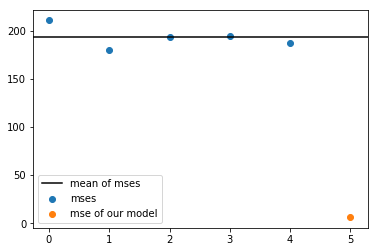

In [74]:
plt.scatter(list(range(len(mses))), mses, label = 'mses')
plt.scatter(5, [len(mses) + 1], label = 'mse of our model')
plt.axhline(np.mean(mses), color = 'black', label = 'mean of mses')
plt.legend()

Pourquoi notre modèle a-t-il un mse bien plus faible que les autres ? La réponse est simple : nous lui avons donné beaucoup plus de données qu'aux autres modèles. Par conséquent, il sait prédire avec plus d'efficacité le futur => d'où son mse plus faible.

### 4.3.3 Cross val score

Tout ce que l'on vient de produire au-dessus peut être réalisé avec l'aide de la fonction **cross_val_score**.

Celle-ci prend en considération plusieurs arguments :
1. une instance vierge de votre modèle
2. tous vos X (sous une forme de tableau à **deux dimensions**)
3. tous vos y (sous une forme de tableau à **une dimension**)
4. scoring = le type de valeur qu'il doit calculer. Nous utiliserons "neg_mean_squared_error"
5. cv (cross validation) = une instance de KFold (entre autres)

En suivant toutes ces règles :

In [75]:
blank_model = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
cross_val_score(blank_model, sp[features], sp[target], scoring="neg_mean_squared_error", cv=kfold)

array([-211.056     , -179.66776119, -193.18238806, -194.88895522,
       -187.42776119])

### 4.3.4 À la recherche du MSE minimal

En faisant appel à **cross_val_score**, nous allons tenter de trouver les features les plus pertinentes ainsi que le bon nombre de voisins.

Commençons par créer une variable "features_optimal" (pour plus de facilitée, nous ne prenons que les variables d'origines [nous ignorons les variables normalisées/standardisées]) et une liste de voisins :

In [81]:
# 1er essai
# features_optimal = ['bpm', 'energy', 'valence', 'loud', 'acoustic', 'popularity', 'length_minutes']
# MSE = 156
# 2e essai
# features_optimal = ['bpm', 'energy', 'valence', 'loud', 'acoustic', 'popularity']
# MSE = 137
# ---> le MSE a baissé en retirant length_minutes. Alors, nous le supprimons définitivement
# 3e essai
# features_optimal = ['bpm', 'energy', 'valence', 'loud', 'acoustic']
# MSE = 157
# ---> en supprimant popularity, mon MSE a augmenté. Donc, nous ne le supprimons pas
# 4e essai
# features_optimal = ['bpm', 'energy', 'valence', 'loud', 'popularity']
# MSE = 139
# ---> le MSE a augmenté, nous ne supprimons pas acoustic
# 5e essai
features_optimal = ['bpm', 'energy', 'valence', 'acoustic', 'popularity']
# ---> en supprimant loud, mon MSE reste toujours à 137. Supprimons le pour baisser la complexité de notre modèle
# ---> et ainsi de suite...
K = list(range(1, 31))

Pour trouver le MSE minimal, retirez au fur et à mesure les features qui font diminuer votre MSE.

In [77]:
matrix_mse = []
for k in K:
    blank_model = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    kfold = KFold(n_splits=5, shuffle=True, random_state=k)
    mses = abs(cross_val_score(blank_model, sp[features_optimal], sp[target], scoring="neg_mean_squared_error", cv=kfold))
    matrix_mse.append(mses)

In [78]:
# nous réalisons la moyenne de chaque ligne
# ainsi, chaque valeur sera la moyenne de chaque valeur de k
mses_by_k = np.mean(matrix_mse, axis = 1)

In [79]:
min(mses_by_k)

137.80024875621888